# Model Prediksi Harga Rumah (Jabodetabek)

Model ini dikembangkan untuk memprediksi kategori harga sebuah rumah dengan menganalisis berbagai atributnya, seperti jumlah kamar, luas tanah, dan luas bangunan.

## Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

### Import Data

In [6]:
data_url = 'https://raw.githubusercontent.com/MuhGhifari/Prediksi-Harga-Rumah-Jabodetabek/refs/heads/main/jabodetabek_house_price.csv'
data = pd.read_csv(
  data_url,
  usecols=[
    'price_in_rp',
    'latitude',
    'longitude',
    'bedrooms',
    'bathrooms',
    'land_size_m2',
    'building_size_m2',
    'carports',
    'maid_bedrooms',
    'maid_bathrooms',
    'floors',
    'building_age',
    'year_built',
    'property_condition',
    'furnishing',
    'garages',
  ]
)

data.rename(
  columns={
    'price_in_rp': 'price',
    'land_size_m2': 'land_size',
    'building_size_m2': 'building_size'
  },
  inplace=True
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               3553 non-null   float64
 1   latitude            3553 non-null   float64
 2   longitude           3553 non-null   float64
 3   bedrooms            3519 non-null   float64
 4   bathrooms           3524 non-null   float64
 5   land_size           3551 non-null   float64
 6   building_size       3551 non-null   float64
 7   carports            3553 non-null   float64
 8   maid_bedrooms       3553 non-null   float64
 9   maid_bathrooms      3553 non-null   float64
 10  floors              3547 non-null   float64
 11  building_age        2108 non-null   float64
 12  year_built          2108 non-null   float64
 13  property_condition  3307 non-null   object 
 14  garages             3553 non-null   float64
 15  furnishing          3166 non-null   object 
dtypes: flo

In [7]:
data.head()

,price,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,garages,furnishing
0,2.990000e+09,-6.223945,106.986275,4.0,4.0,239.0,272.0,0.0,0.0,1.0,2.0,5.0,2017.0,bagus,0.0,unfurnished
1,1.270000e+09,-6.223945,106.986275,3.0,2.0,55.0,69.0,1.0,0.0,0.0,2.0,NaN,NaN,bagus,0.0,NaN
2,1.950000e+09,-6.223945,106.986275,3.0,3.0,119.0,131.0,1.0,1.0,1.0,2.0,NaN,NaN,bagus,1.0,unfurnished
3,3.300000e+09,-6.223945,106.986275,3.0,3.0,180.0,174.0,0.0,1.0,1.0,2.0,6.0,2016.0,bagus sekali,2.0,unfurnished
4,4.500000e+09,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,1.0,1.0,2.0,9.0,2013.0,bagus,1.0,unfurnished


### Clean Null Values

Lihat kolom-kolom yang mempunyai nilai NULL

In [8]:
nullColumns = data.columns[data.isnull().any()]
print(nullColumns)

rowsBeforeCleaning = len(data)

Index(['bedrooms', 'bathrooms', 'land_size', 'building_size', 'floors',
       'building_age', 'year_built', 'property_condition', 'furnishing'],
      dtype='object')


#### Bedrooms
hapus semua data yang tidak mempunyai info 'bedrooms"

In [9]:
nullIndex = pd.isnull(data['bedrooms'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['bedrooms'])

effected rows : 34


#### Bathrooms
hapus semua data yang tidak mempunyai info 'bathrooms'

In [10]:
nullIndex = pd.isnull(data['bathrooms'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['bathrooms'])

effected rows : 5


#### Floors
hapus semua data yang tidak mempunyai info 'floors'

In [11]:
nullIndex = pd.isnull(data['floors'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['floors'])

effected rows : 4


#### Building Age
lihat semua data yang tidak mempunyai umur bangunan

In [12]:
nullIndex = pd.isnull(data['building_age'])
print(f"effected rows : {len(data[nullIndex])}")
data['building_age'].fillna(data['building_age'].median(), inplace=True)

effected rows : 1429


<ipython-input-12-946289323>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['building_age'].fillna(data['building_age'].median(), inplace=True)


Lihat semua data umur bangunan dan tahun dibangunnya

In [13]:
print(data['building_age'].unique())

[  5.   0.   6.   9.   8.   7.   2.   4.  11.   1.  12.  16.  22.   3.
  15.  13.  10.  18.  37.  14.  21.  17.  28.  19.  20.  27. 152.  52.
  36.  42.  26.  29.  32.  23.  34.  40.  24.  46.  45.  49. 121.  30.]


In [14]:
print(data['year_built'].sort_values().unique())

[1870. 1901. 1970. 1973. 1976. 1977. 1980. 1982. 1985. 1986. 1988. 1990.
 1992. 1993. 1994. 1995. 1996. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2052.   nan]


Lihat grafik umur dan tahun dibangun

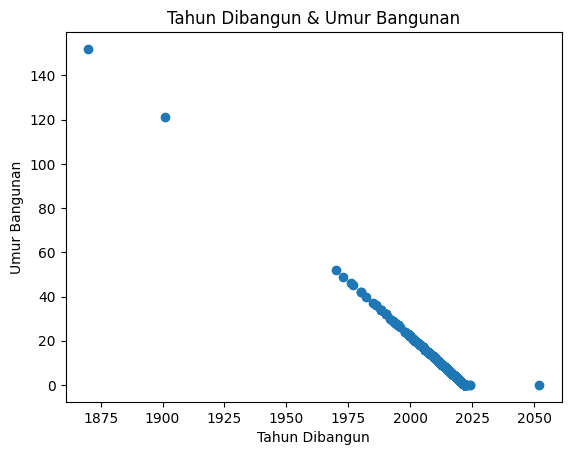

In [15]:
plt.scatter(data['year_built'], data['building_age'])
plt.xlabel('Tahun Dibangun')
plt.ylabel('Umur Bangunan')
plt.title('Tahun Dibangun & Umur Bangunan')
plt.show()

Dapat dilihat bahwa terdapat data yang tidak valid, yaitu bangunan yang tercatat dibangun setelah tahun **2022** (*tahun pengumpulan data*). Selain itu, seluruh bangunan yang dibangun pada tahun 2022 memiliki usia 0 tahun, sehingga dapat disimpulkan bahwa data ini memang dikumpulkan pada tahun 2022. Oleh karena itu, seluruh entri bangunan dengan tahun pembangunan lebih dari 2022 akan dihapus dari dataset.

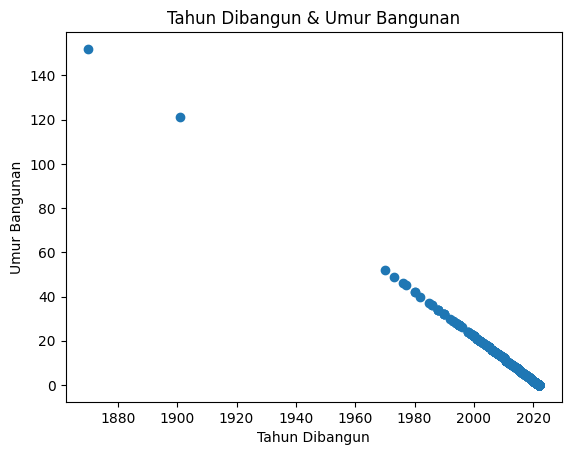

In [16]:
data = data.drop(data[data['year_built'] > 2022].index)
plt.scatter(data['year_built'], data['building_age'])
plt.xlabel('Tahun Dibangun')
plt.ylabel('Umur Bangunan')
plt.title('Tahun Dibangun & Umur Bangunan')
plt.show()

In [17]:
data = data.drop(columns=['year_built'])

#### Property Condition
Hapus semua data yang tidak memiliki kondisi properti



In [18]:
nullIndex = pd.isnull(data['property_condition'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['property_condition'])

effected rows : 237


#### Hasil Cleaning

Lihat kolom yang mempunyai null

In [19]:
nullColumns = data.columns[data.isnull().any()]
print(nullColumns)

Index(['furnishing'], dtype='object')


Dapat dilihat bahwa masih ada beberapa data yang memiliki **NULL** values, namun data-data tersebut sangat banyak dan atribut selain `year_built` dan `building_age` masih dapat dipakai untuk keperluan lainnya, maka data-data tersebut masih disimpan.

Jumlah data yang dihapus

In [20]:
rowsAfterCleaning = len(data)
print(f"Jumlah data sebelum cleaning : {rowsBeforeCleaning}")
print(f"Jumlah data setelah cleaning : {rowsAfterCleaning}")
print(f"Jumlah data yang dihapus : {rowsBeforeCleaning - rowsAfterCleaning}")

Jumlah data sebelum cleaning : 3553
Jumlah data setelah cleaning : 3269
Jumlah data yang dihapus : 284


### Transformasi Data

#### Property Condition

In [21]:
data['property_condition'].unique()

array(['bagus', 'bagus sekali', 'baru', 'sudah renovasi',
       'butuh renovasi', 'semi furnished', 'unfurnished'], dtype=object)

In [22]:
data['property_condition'] = data['property_condition'].replace({
  'bagus' : 'Siap Huni',
  'bagus sekali' : 'Siap Huni',
  'baru' : 'Baru',
  'sudah renovasi' : 'Baru',
  'semi furnished' : 'Siap Huni',
  'unfurnished' : 'Baru',
  'butuh renovasi' : 'Butuh Renovasi'
})

affectedRows = len(data[data['property_condition'].notna()])

nullIndex = data['property_condition'].isna()

# Change the null values to "Baru" if `year_built` is 2021 or later, and "Siap Huni" if older
dataUpdate = data.loc[nullIndex].apply(lambda row: 'Baru' if pd.isna(row['property_condition']) and row['year_built'] >= 2021 else('Siap Huni'), axis=1)

affectedRows += len(dataUpdate)

data.loc[nullIndex, 'property_condition'] = dataUpdate

print(f"effected rows : {affectedRows}")

effected rows : 3269


In [23]:
data['property_condition'].unique()

array(['Siap Huni', 'Baru', 'Butuh Renovasi'], dtype=object)

In [24]:
# convert property_condition to numerical values
property_condition_map = {
  'Butuh Renovasi': 0,
  'Siap Huni': 1,
  'Baru': 2
}

data['property_condition'] = data['property_condition'].map(property_condition_map)
data['property_condition'].unique()

array([1, 2, 0])

#### Furnishing

In [25]:
data['furnishing'].unique()

array(['unfurnished', nan, 'semi furnished', 'furnished', 'baru'],
      dtype=object)

In [26]:
affectedRows = len(data[data['furnishing'] == 'baru'])
data['furnishing'] = data['furnishing'].replace({'baru' : 'unfurnished'})

# Fill null values depending on `property_condition` value
nullIndex = data['furnishing'].isna()
dataUpdate = data.loc[nullIndex].apply(lambda row: 'unfurnished' if row['property_condition'] == 'Baru' else('semi furnished'), axis=1)
affectedRows += len(dataUpdate)
data.loc[nullIndex, 'furnishing'] = dataUpdate
print(f"effected rows : {affectedRows}")

effected rows : 346


In [27]:
data['furnishing'].unique()

array(['unfurnished', 'semi furnished', 'furnished'], dtype=object)

In [28]:
# convert furnishing to numerical values
furnishing_map = {
  'unfurnished': 0,
  'semi furnished': 1,
  'furnished': 2
}

data['furnishing'] = data['furnishing'].map(furnishing_map)
data['furnishing'].unique()

array([0, 1, 2])

#### Hasil Tranformasi

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 3552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               3269 non-null   float64
 1   latitude            3269 non-null   float64
 2   longitude           3269 non-null   float64
 3   bedrooms            3269 non-null   float64
 4   bathrooms           3269 non-null   float64
 5   land_size           3269 non-null   float64
 6   building_size       3269 non-null   float64
 7   carports            3269 non-null   float64
 8   maid_bedrooms       3269 non-null   float64
 9   maid_bathrooms      3269 non-null   float64
 10  floors              3269 non-null   float64
 11  building_age        3269 non-null   float64
 12  property_condition  3269 non-null   int64  
 13  garages             3269 non-null   float64
 14  furnishing          3269 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 408.6 KB


In [30]:
data.head()

,price,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,-6.223945,106.986275,4.0,4.0,239.0,272.0,0.0,0.0,1.0,2.0,5.0,1,0.0,0
1,1.270000e+09,-6.223945,106.986275,3.0,2.0,55.0,69.0,1.0,0.0,0.0,2.0,0.0,1,0.0,1
2,1.950000e+09,-6.223945,106.986275,3.0,3.0,119.0,131.0,1.0,1.0,1.0,2.0,0.0,1,1.0,0
3,3.300000e+09,-6.223945,106.986275,3.0,3.0,180.0,174.0,0.0,1.0,1.0,2.0,6.0,1,2.0,0
4,4.500000e+09,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,1.0,1.0,2.0,9.0,1,1.0,0


In [31]:
data.describe()

,price,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
count,3.269000e+03,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000
mean,4.275789e+09,-6.324122,106.790932,3.338024,2.639951,204.866626,189.442949,1.232181,0.502906,0.386663,1.776690,2.351790,1.429795,0.707250,0.482716
std,1.415047e+10,0.128890,0.166458,2.732096,2.751945,400.149681,254.256563,1.090290,0.681371,0.538953,0.638183,5.945474,0.546811,1.350783,0.623949
min,4.200000e+07,-6.894828,106.412020,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,72.000000,65.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,116.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,3.700000e+09,-6.232794,106.874766,4.000000,3.000000,198.000000,220.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,6.000000,5.000000,5.000000,152.000000,2.000000,50.000000,2.000000


### Hilangkan Outlier

#### Garis Lintang & Garis Bujur

<Axes: xlabel='longitude', ylabel='latitude'>

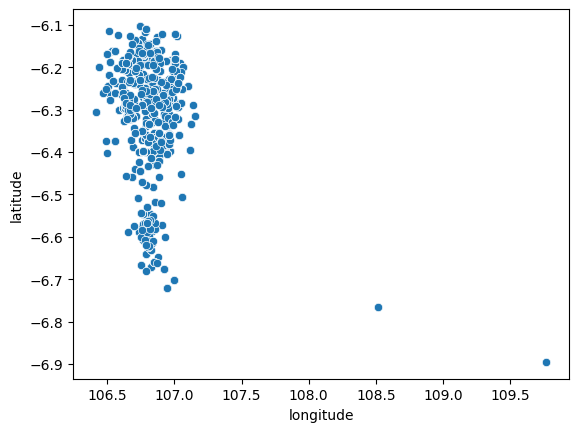

In [32]:
sns.scatterplot(data = data, x='longitude', y='latitude')

In [33]:
data.drop(data[data['longitude'] > 108].index, inplace=True)
data.drop(data[data['latitude'] > 6.788].index, inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

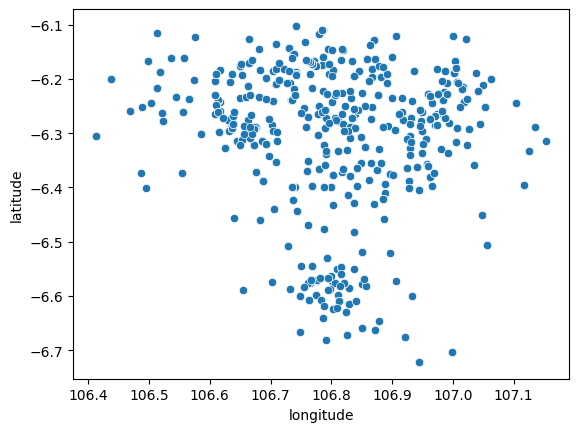

In [34]:
sns.scatterplot(data = data, x='longitude', y='latitude')

#### Harga

<Axes: ylabel='price'>

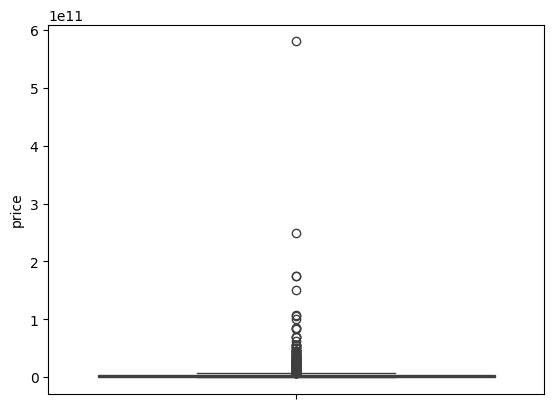

In [35]:
sns.boxplot(data['price'])

In [36]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

affectedRows = len(data[data['price'] > upper]) + len(data[data['price'] < lower])

data.drop(data[data['price'] > upper].index, inplace=True)
data.drop(data[data['price'] < lower].index, inplace=True)

print(f"affected rows : {affectedRows}")

affected rows : 351


<Axes: ylabel='price'>

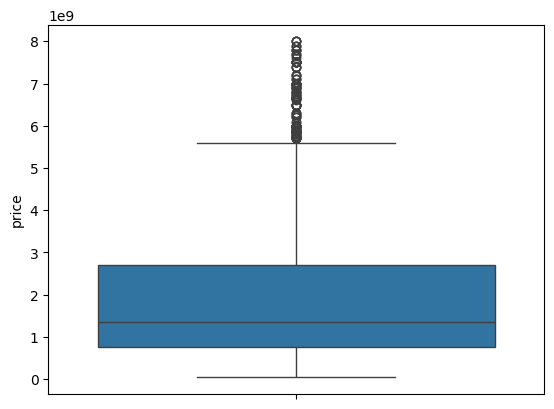

In [37]:
sns.boxplot(data['price'])

### Export Cleaned Data

In [38]:
data.to_csv('jabodetabek_house_price_cleaned.csv', index=False)
print("Data berhasil diekspor ke jabodetabek_house_price_cleaned.csv")

Data berhasil diekspor ke jabodetabek_house_price_cleaned.csv


## Pengembangan Model

In [39]:
df_url = 'https://raw.githubusercontent.com/MuhGhifari/Prediksi-Harga-Rumah-Jabodetabek/refs/heads/main/jabodetabek_house_price_cleaned.csv'
df = pd.read_csv(df_url)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               2914 non-null   float64
 1   latitude            2914 non-null   float64
 2   longitude           2914 non-null   float64
 3   bedrooms            2914 non-null   float64
 4   bathrooms           2914 non-null   float64
 5   land_size           2914 non-null   float64
 6   building_size       2914 non-null   float64
 7   carports            2914 non-null   float64
 8   maid_bedrooms       2914 non-null   float64
 9   maid_bathrooms      2914 non-null   float64
 10  floors              2914 non-null   float64
 11  building_age        2914 non-null   float64
 12  property_condition  2914 non-null   int64  
 13  garages             2914 non-null   float64
 14  furnishing          2914 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 341.6 KB


In [41]:
df.head()

,price,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,-6.223945,106.986275,4.0,4.0,239.0,272.0,0.0,0.0,1.0,2.0,5.0,1,0.0,0
1,1.270000e+09,-6.223945,106.986275,3.0,2.0,55.0,69.0,1.0,0.0,0.0,2.0,0.0,1,0.0,1
2,1.950000e+09,-6.223945,106.986275,3.0,3.0,119.0,131.0,1.0,1.0,1.0,2.0,0.0,1,1.0,0
3,3.300000e+09,-6.223945,106.986275,3.0,3.0,180.0,174.0,0.0,1.0,1.0,2.0,6.0,1,2.0,0
4,4.500000e+09,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,1.0,1.0,2.0,9.0,1,1.0,0


In [42]:
df.describe()

,price,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
count,2.914000e+03,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,1.985499e+09,-6.330428,106.791922,3.069664,2.326012,141.002402,135.267330,1.102951,0.394303,0.316060,1.722375,2.024708,1.459506,0.562114,0.444749
std,1.695363e+09,0.126065,0.146863,1.224375,1.127366,209.488873,113.281862,0.782822,0.538891,0.479554,0.595325,4.898216,0.543261,0.793740,0.609909
min,4.200000e+07,-6.721369,106.412020,1.000000,1.000000,12.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.640000e+08,-6.399113,106.687295,2.000000,2.000000,72.000000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.350000e+09,-6.305380,106.799954,3.000000,2.000000,98.000000,100.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,2.707500e+09,-6.236815,106.885539,4.000000,3.000000,152.000000,176.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
max,8.000000e+09,-6.102478,107.154263,37.000000,16.000000,4640.000000,2000.000000,12.000000,3.000000,2.000000,4.000000,52.000000,2.000000,10.000000,2.000000


In [43]:
# standardization
X1 = df.iloc[:, 1:15]
X2 = df.iloc[:, 1:15]

In [44]:
from sklearn.preprocessing import StandardScaler

scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=['latitude', 'longitude', 'bedrooms', 'bathrooms', 'land_size', 'building_size', 'carports', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'building_age', 'property_condition', 'garages', 'furnishing'])
X1.head()

,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,0.844813,1.323591,0.759977,1.485121,0.467874,1.207220,-1.409185,-0.731820,1.426444,0.466423,0.607528,-0.845974,-0.708306,-0.729331
1,0.844813,1.323591,-0.056907,-0.289230,-0.410605,-0.585078,-0.131536,-0.731820,-0.659185,0.466423,-0.413427,-0.845974,-0.708306,0.910538
2,0.844813,1.323591,-0.056907,0.597945,-0.105047,-0.037676,-0.131536,1.124162,1.426444,0.466423,-0.413427,-0.845974,0.551769,-0.729331
3,0.844813,1.323591,-0.056907,0.597945,0.186188,0.341973,-1.409185,1.124162,1.426444,0.466423,0.811719,-0.845974,1.811844,-0.729331
4,0.844813,1.323591,0.759977,0.597945,0.892791,0.536212,1.146114,1.124162,1.426444,0.466423,1.424292,-0.845974,0.551769,-0.729331


In [51]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
train_data = X_train.join(y_train)
train_data

,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing,price
2161,-6.102478,106.741190,4.0,4.0,160.0,200.0,1.0,1.0,1.0,3.0,0.0,1,2.0,1,5.990000e+09
2635,-6.249321,106.780382,4.0,2.0,133.0,180.0,0.0,0.0,0.0,2.0,49.0,2,0.0,2,1.500000e+09
3105,-6.300733,106.586126,3.0,2.0,250.0,200.0,1.0,1.0,1.0,2.0,5.0,1,0.0,1,4.300000e+09
1045,-6.482454,106.836705,3.0,1.0,131.0,177.0,0.0,0.0,0.0,2.0,6.0,1,1.0,0,8.500000e+08
1446,-6.580990,106.814430,4.0,3.0,351.0,150.0,1.0,1.0,1.0,2.0,0.0,1,0.0,0,3.300000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,-6.397933,106.767961,3.0,3.0,101.0,78.0,1.0,0.0,0.0,2.0,0.0,2,1.0,1,9.010000e+08
1266,-6.401493,106.927937,2.0,1.0,70.0,36.0,1.0,0.0,0.0,1.0,0.0,2,1.0,0,5.510000e+08
1302,-6.439710,106.705160,2.0,1.0,61.0,40.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1,4.400000e+08
1483,-6.399113,106.799954,2.0,1.0,75.0,45.0,1.0,0.0,0.0,1.0,1.0,2,0.0,0,6.500000e+08


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'land_size'}>,
        <Axes: title={'center': 'building_size'}>,
        <Axes: title={'center': 'carports'}>,
        <Axes: title={'center': 'maid_bedrooms'}>],
       [<Axes: title={'center': 'maid_bathrooms'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'building_age'}>,
        <Axes: title={'center': 'property_condition'}>],
       [<Axes: title={'center': 'garages'}>,
        <Axes: title={'center': 'furnishing'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

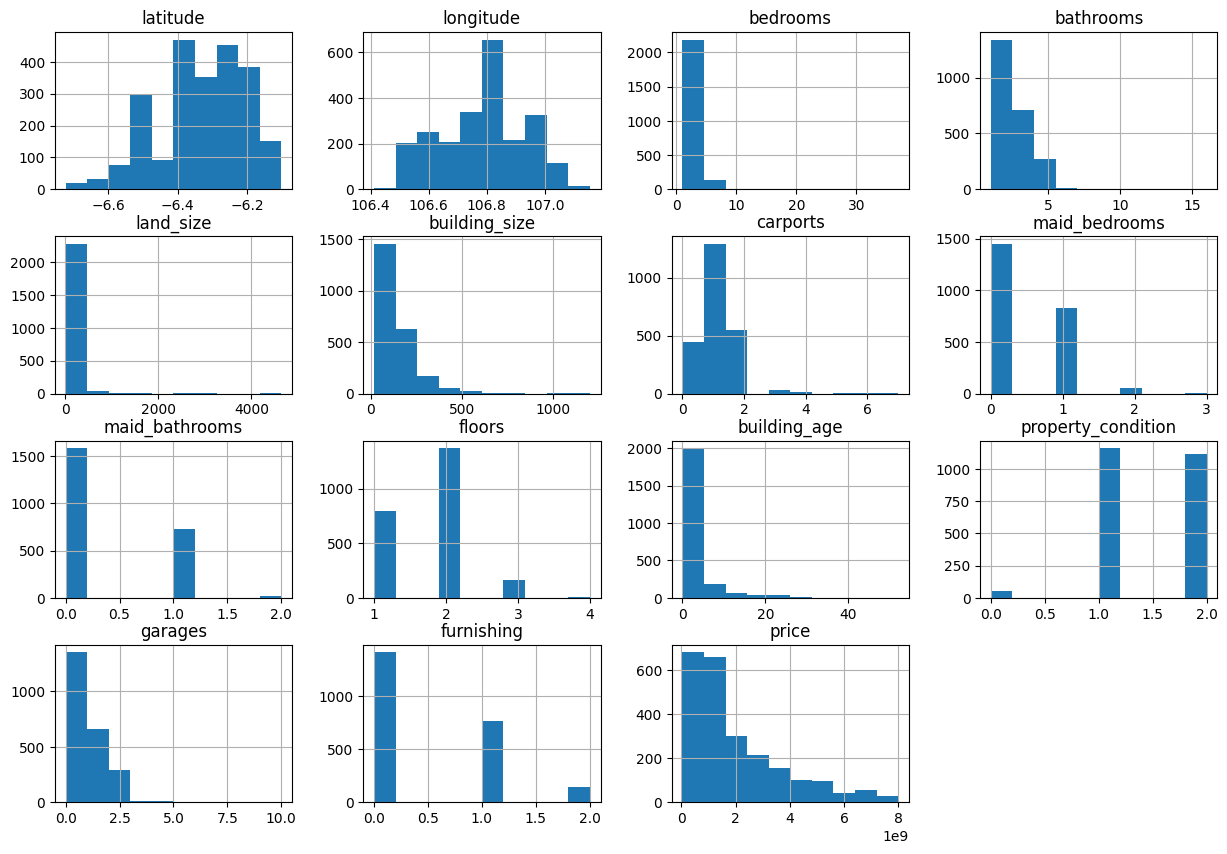

In [56]:
train_data.hist(figsize=(15,10))

In [57]:
train_data.corr()

,latitude,longitude,bedrooms,bathrooms,land_size,building_size,carports,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing,price
latitude,1.000000,-0.187120,0.017133,0.089197,-0.208590,0.018522,-0.013888,0.057312,0.096682,0.217805,0.014822,0.037391,-0.054070,0.044103,0.160621
longitude,-0.187120,1.000000,-0.112987,-0.168783,0.020049,-0.107918,-0.026363,-0.136913,-0.186458,-0.201088,0.024157,-0.011950,-0.037430,-0.152988,-0.278745
bedrooms,0.017133,-0.112987,1.000000,0.738635,0.349498,0.553933,0.133343,0.288363,0.290192,0.365692,0.141857,-0.118461,0.161806,0.181818,0.461911
bathrooms,0.089197,-0.168783,0.738635,1.000000,0.345235,0.642832,0.202734,0.443564,0.418098,0.553469,0.050295,-0.076590,0.177681,0.229021,0.620618
land_size,-0.208590,0.020049,0.349498,0.345235,1.000000,0.524759,0.177365,0.247862,0.263388,0.049694,0.209493,-0.195948,0.174641,0.113931,0.410633
building_size,0.018522,-0.107918,0.553933,0.642832,0.524759,1.000000,0.258472,0.556010,0.555825,0.430173,0.240387,-0.230456,0.196309,0.249303,0.785353
carports,-0.013888,-0.026363,0.133343,0.202734,0.177365,0.258472,1.000000,0.248116,0.282408,0.196768,0.066395,0.044047,0.074079,0.062795,0.287021
maid_bedrooms,0.057312,-0.136913,0.288363,0.443564,0.247862,0.556010,0.248116,1.000000,0.767788,0.347393,0.180981,-0.136538,0.134398,0.129714,0.619055
maid_bathrooms,0.096682,-0.186458,0.290192,0.418098,0.263388,0.555825,0.282408,0.767788,1.000000,0.347575,0.226644,-0.051752,0.163655,0.223238,0.650976
floors,0.217805,-0.201088,0.365692,0.553469,0.049694,0.430173,0.196768,0.347393,0.347575,1.000000,0.003559,0.012277,0.123578,0.186355,0.468189


<Axes: >

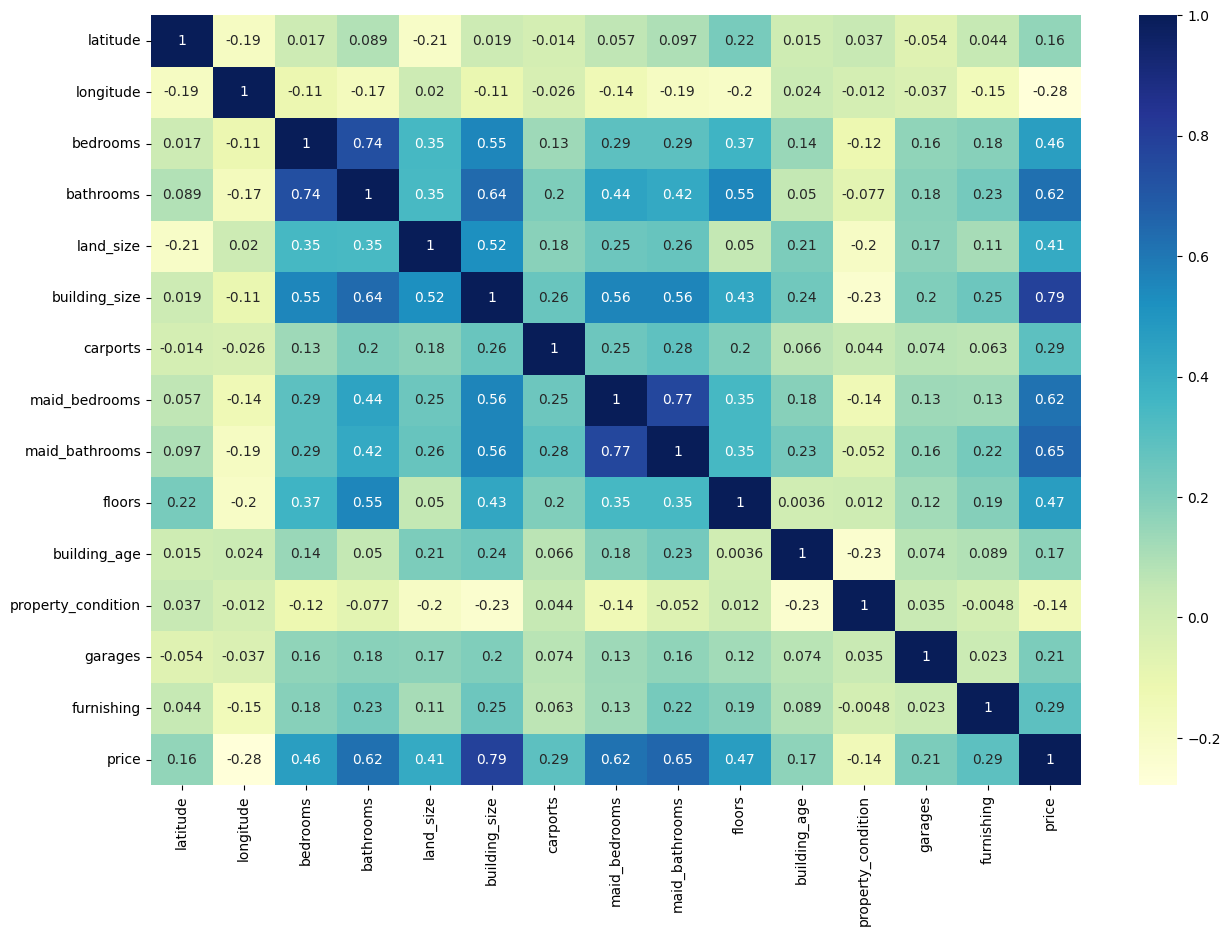

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')